In [1]:
import pandas as pd
import numpy as np
import plotnine
from plotnine import *

import requests
import json

import os

## 0.Read data file

In [2]:
Root_Path=os.path.abspath(os.path.dirname(os.getcwd()))

In [3]:
# DC_finance=pd.read_excel("../Dataset/school_spending/DC_1819_final_September_23rd_22.xlsx")
DC_finance_2018=pd.read_excel("../Dataset/NCES/DC_1819.xlsx")
DC_STAR_2018=pd.read_csv("../Dataset/OSSEDC/2018/2018_STAR_Score.csv")
# DC_HIGH_SAT=pd.read()
print(DC_finance_2018.shape)
print(DC_STAR_2018.shape)

(242, 39)
(248, 12)


In [5]:
DC_finance_2019=pd.read_excel("../Dataset/NCES/DC_1920.xlsx")
DC_STAR_2019=pd.read_csv("../Dataset/OSSEDC/2019/2019_STAR_Score.csv")
# DC_HIGH_SAT=pd.read()
print(DC_finance_2019.shape)
print(DC_STAR_2019.shape)

(242, 38)
(251, 13)


**Find join key**

In [6]:
print(DC_STAR_2018.columns)
print(DC_finance_2018.columns)

Index(['LEA Code', 'LEA Name', 'School Code', 'School Name', 'School Type',
       'Ward', 'School Framework', 'Framework Weight',
       'Framework Points Earned', 'Framework Points Possible',
       'Framework STAR Score', 'Framework STAR Rating'],
      dtype='object')
Index(['state', 'year', 'distid_stateassigned', 'schoolid_stateassigned',
       'distname', 'schoolname', 'ncesdistid_admin', 'ncesdistid_geo',
       'census_id', 'ncesid', 'ncesenroll', 'gradespan', 'level',
       'enroll_raw_DC', 'enrollmetric', 'pp_stloc_raw_DC', 'pp_fed_raw_DC',
       'pp_total_raw_DC', 'pp_site_stloc_raw_DC', 'pp_site_fed_raw_DC',
       'pp_site_raw_DC', 'pp_centshare_stloc_raw_DC',
       'pp_centshare_fed_raw_DC', 'pp_centshare_raw_DC', 'schoolstloc_raw_DC',
       'schoolfed_raw_DC', 'schooltot_raw_DC', 'pp_total_norm_NERDS',
       'disttotwexclu_raw_DC', 'distexclu_raw_DC', 'schtype_raw_DC',
       'ward_raw_DC', 'countenroll', 'noaudit', 'nositecen', 'adfinvars',
       'distflex', 'fl

Left on should be "schoolid_stateassigned", Right on should be "School Code"

## 2. Join STAR data to main data 

Merge STAR data with financial data

In [73]:
DC_full_STAR_2018=pd.merge(DC_finance_2018,DC_STAR_2018,left_on="schoolid_stateassigned",right_on="School Code",how="inner")

In [74]:
DC_full_STAR_2018.shape

(237, 51)

In [59]:
print("Number of STAR without finanicial data is: ",
      DC_STAR_2018[-DC_STAR_2018["School Code"].isin(DC_finance_2018.schoolid_stateassigned)].shape[0])
print("Number of schools doesn't have a STAR score is :",
      DC_finance_2018[-DC_finance_2018.schoolid_stateassigned.isin(DC_STAR_2018["School Code"])].shape[0])

Number of STAR without finanicial data is:  11
Number of schools doesn't have a STAR score is : 45


In [60]:
DC_full_STAR_2018.enrollmetric.unique()

array(['October Count Day'], dtype=object)

In [67]:
DC_full_STAR.columns

Index(['state', 'year', 'distid_stateassigned', 'schoolid_stateassigned',
       'distname', 'schoolname', 'ncesdistid_admin', 'ncesdistid_geo',
       'census_id', 'ncesid', 'ncesenroll', 'gradespan', 'level',
       'enroll_raw_DC', 'enrollmetric', 'pp_stloc_raw_DC', 'pp_fed_raw_DC',
       'pp_total_raw_DC', 'pp_site_stloc_raw_DC', 'pp_site_fed_raw_DC',
       'pp_site_raw_DC', 'pp_centshare_stloc_raw_DC',
       'pp_centshare_fed_raw_DC', 'pp_centshare_raw_DC', 'schoolstloc_raw_DC',
       'schoolfed_raw_DC', 'schooltot_raw_DC', 'pp_total_norm_NERDS',
       'disttotwexclu_raw_DC', 'distexclu_raw_DC', 'schtype_raw_DC',
       'ward_raw_DC', 'countenroll', 'noaudit', 'nositecen', 'adfinvars',
       'distflex', 'flag_nerds', 'flag_f33', 'LEA Code', 'LEA Name',
       'School Code', 'School Name', 'School Type', 'Ward', 'School Framework',
       'Framework Weight', 'Framework Points Earned',
       'Framework Points Possible', 'Framework STAR Score',
       'Framework STAR Rating'],

In [75]:
DC_full_STAR.isna().sum()
subset = ["year","schoolname","pp_total_raw_DC",
          "pp_site_raw_DC","pp_centshare_raw_DC","schoolstloc_raw_DC",
           'schtype_raw_DC', 'ward_raw_DC',
         "School Type","Framework STAR Score","Framework STAR Rating"]
DC_full_STAR_sub_2018 = DC_full_STAR[subset]

## 3. Join SAT data

Use SAT as the performance of high-schools 

In [9]:
DC_PER_SAT=pd.read_excel("Dataset/DCPS/School Year 2018-2019 SAT Scores.xlsx")
DC_PER_SAT.shape

(21, 6)

In [10]:
DC_full_SAT=pd.merge(DC_finance,DC_PER_SAT,left_on="schoolid_stateassigned",right_on="School Code",how="inner")

In [11]:
DC_full_SAT.shape

(20, 45)

## 4. EDA about STAR score

In [76]:
DC_full_STAR_sub_2018["Framework STAR Score"].describe()

count    237.000000
mean      49.984262
std       21.525150
min        2.850000
25%       31.870000
50%       50.080000
75%       65.230000
max       99.320000
Name: Framework STAR Score, dtype: float64

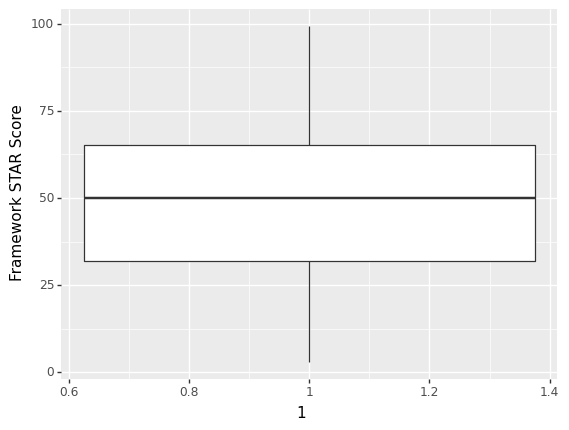

<ggplot: (8778864322588)>

In [77]:
ggplot(DC_full_STAR_2018,aes(x=1,y="Framework STAR Score"))+geom_boxplot()

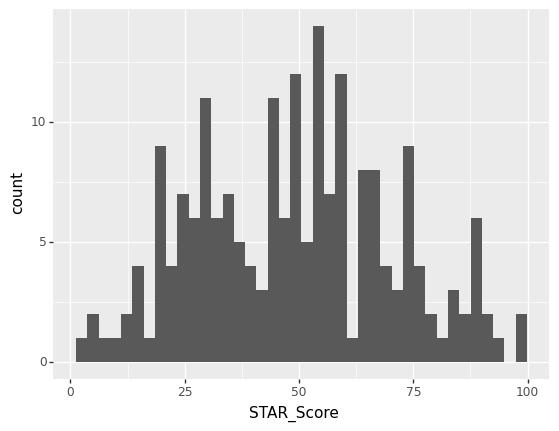

<ggplot: (8788915963850)>

In [14]:
ggplot(DC_full_STAR,aes(x="STAR_Score"))+geom_histogram(bins=40)

In [15]:
school_type1=DC_full_STAR[DC_full_STAR.School_Type=="Charter (Alternative)"]
school_type2=DC_full_STAR[DC_full_STAR.School_Type=="Charter"]
school_type3=DC_full_STAR[DC_full_STAR.School_Type=="DCPS (Alternative)"]
school_type4=DC_full_STAR[DC_full_STAR.School_Type=="DCPS"]

school_type1.School_Type = "Charter"
school_type3.School_Type = "DCPS"

DC_full_STAR=pd.concat([school_type1,school_type2,school_type3,school_type4]).reset_index()

/var/folders/y9/67sdlxsn4x98qx7fhv2ccjxr0000gn/T/ipykernel_7093/619826509.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/y9/67sdlxsn4x98qx7fhv2ccjxr0000gn/T/ipykernel_7093/619826509.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [63]:
DC_full_STAR.groupby("School_Type")["state"].count()

School_Type
Charter     89
DCPS       108
Name: state, dtype: int64

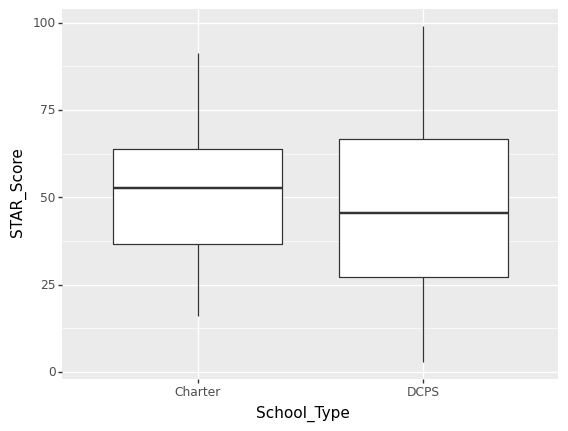

<ggplot: (8781641683450)>

In [62]:
ggplot(DC_full_STAR,aes(x="School_Type",y="STAR_Score"))+geom_boxplot()

The variation of DCPS School is much larger, both the best and worst school are DCPS.Charter school is much stable.

From the boxplot and histogram. The distribution of the STAR is roughly close to normal distribution. Also there are not outliers.

In [30]:
DC_PER_STAR

,LEA_Code,LEA_Name,School_Code,School_Name,School_Type,Ward,STAR_Score,STAR_Rating,ObjectId
0,133,Maya Angelou PCS,101,Maya Angelou PCS - High School,Charter (Alternative),7,48.21,3,159
1,109,Cesar Chavez PCS for Public Policy,102,Cesar Chavez PCS for Public Policy - Parkside ...,Charter,7,35.63,2,33
2,109,Cesar Chavez PCS for Public Policy,109,Cesar Chavez PCS for Public Policy - Parkside ...,Charter,7,47.68,3,32
3,120,Friendship PCS,113,Friendship PCS - Southeast Academy,Charter,8,35.96,2,69
4,121,Hope Community PCS,114,Hope Community PCS - Tolson,Charter,5,51.40,3,81
...,...,...,...,...,...,...,...,...,...
198,167,Richard Wright PCS for Journalism and Media Arts,3067,Richard Wright PCS for Journalism and Media Arts,Charter,6,50.00,3,186
199,168,Basis DC PCS,3068,BASIS DC PCS,Charter,2,88.42,5,187
200,169,Creative Minds International PCS,3069,Creative Minds International PCS,Charter,5,40.76,3,188
201,170,DC Scholars PCS,3070,DC Scholars PCS,Charter,7,24.97,2,189
